# Hodgkin-Huxley model specifications
This lays out the parameterizations for the HH point cells for the event-based encodings manuscript.

In [1]:
import sys
import numpy as np
import random
import pandas as pd
from neuron import h
h.load_file("stdrun.hoc")

import matplotlib.pyplot as plt
import matplotlib.pylab as pl
import matplotlib as mpl
sys.path.insert(1, "./utils/")
import HH, Stimuli

## generate stimuli

In [2]:
sim_duration = 100000
sims = {
    'base':{},
    'half_weight':{},
    'long_tau':{},
    'long_tau_half_weight':{},
    'burst':{}
}

e_times = Stimuli.poisson_process_duration(5, sim_duration)
i_times = Stimuli.poisson_process_duration(15, sim_duration)

## Set up point cell models

In [3]:
# base
base_e_weight = 0.0002
base_i_weight = 0.0005
base_e_tau = 2
base_i_tau = 6

# low weight
lw_e_weight = 0.00015
lw_i_weight = 0.0002
lw_e_tau = 2
lw_i_tau = 6

# long tau
lt_e_weight = 0.0002
lt_i_weight = 0.0005
lt_e_tau = 10
lt_i_tau = 40

# low weight long tau
lwlt_e_weight = 0.00015
lwlt_i_weight = 0.0002
lwlt_e_tau = 10
lwlt_i_tau = 40

# burst
burst_e_weight = 0.0001
burst_i_weight = 0.0005
burst_e_tau = 40
burst_i_tau = 20

In [4]:
# base
base_hh = HH.HH()
base_e_stims = Stimuli.PoissonStim(
    name='base', 
    stim_id = 'na',
    interval = 5,
    rev_potential = 0,
    weight = base_e_weight,
    tau = base_e_tau,
    seed = 'na',
    stim_times = e_times
)
base_i_stims = Stimuli.PoissonStim(
    name='base', 
    stim_id = 'na',
    interval = 15,
    rev_potential = -80,
    weight = base_i_weight,
    tau = base_i_tau,
    seed = 'na',
    stim_times = i_times
)

base_hh.add_custom_stimulus(base_e_stims)
base_hh.add_custom_stimulus(base_i_stims)
base_hh.run_simulation(sim_duration)

# half weight
hw_hh = HH.HH()
hw_e_stims = Stimuli.PoissonStim(
    name='', 
    stim_id = 'na',
    interval = 5,
    rev_potential = 0,
    weight = lw_e_weight,
    tau = lw_e_tau,
    seed = 'na',
    stim_times = e_times
)
hw_i_stims = Stimuli.PoissonStim(
    name='', 
    stim_id = 'na',
    interval = 15,
    rev_potential = -80,
    weight = lw_i_weight,
    tau = lw_i_tau,
    seed = 'na',
    stim_times = i_times
)

hw_hh.add_custom_stimulus(hw_e_stims)
hw_hh.add_custom_stimulus(hw_i_stims)
hw_hh.run_simulation(sim_duration)

# long tau
lt_hh = HH.HH()
lt_e_stims = Stimuli.PoissonStim(
    name='', 
    stim_id = 'na',
    interval = 5,
    rev_potential = 0,
    weight = lt_e_weight,
    tau = lt_e_tau,
    seed = 'na',
    stim_times = e_times
)
lt_i_stims = Stimuli.PoissonStim(
    name='', 
    stim_id = 'na',
    interval = 15,
    rev_potential = -80,
    weight = lt_i_weight,
    tau = lt_i_tau,
    seed = 'na',
    stim_times = i_times
)

lt_hh.add_custom_stimulus(lt_e_stims)
lt_hh.add_custom_stimulus(lt_i_stims)
lt_hh.run_simulation(sim_duration)

# half weight long tau
hwlt_hh = HH.HH()
hwlt_e_stims = Stimuli.PoissonStim(
    name='', 
    stim_id = 'na',
    interval = 5,
    rev_potential = 0,
    weight = lwlt_e_weight,
    tau = lwlt_e_tau,
    seed = 'na',
    stim_times = e_times
)
hwlt_i_stims = Stimuli.PoissonStim(
    name='', 
    stim_id = 'na',
    interval = 15,
    rev_potential = -80,
    weight = lwlt_i_weight,
    tau = lwlt_i_tau,
    seed = 'na',
    stim_times = i_times
)

hwlt_hh.add_custom_stimulus(hwlt_e_stims)
hwlt_hh.add_custom_stimulus(hwlt_i_stims)
hwlt_hh.run_simulation(sim_duration)

# burst
burst_hh = HH.HH()
#burst_hh.axon.insert(h.Nap)
burst_e_stims = Stimuli.PoissonStim(
    name='', 
    stim_id = 'na',
    interval = 5,
    rev_potential = 0,
    weight = burst_e_weight,
    tau = burst_e_tau,
    seed = 'na',
    stim_times = e_times
)
burst_i_stims = Stimuli.PoissonStim(
    name='', 
    stim_id = 'na',
    interval = 15,
    rev_potential = -80,
    weight = burst_i_weight,
    tau = burst_i_tau,
    seed = 'na',
    stim_times = i_times
)

burst_hh.add_custom_stimulus(burst_e_stims)
burst_hh.add_custom_stimulus(burst_i_stims)
burst_hh.run_simulation(sim_duration)

In [5]:
sims = [base_hh, hw_hh, lt_hh, hwlt_hh, burst_hh]
colors = ['maroon','orangered','darkgreen','teal','indigo']
sim_names = ['base','low weight','long tau','low weight\nlong tau','burst']

## General Statistics

In [6]:
for sim, sim_name in zip(sims, sim_names):
    
    spikes = list(sim.spike_times)
    isis = [spikes[i+1] - spikes[i] for i in range(len(spikes)-1)]

    print(sim_name)
    print(f'\taverage spike frequency: {len(spikes) / (sim_duration / 1000)} Hz')
    print(f'\tcoefficient of variation (CV) of ISIs: {np.std(isis) / np.mean(isis)}')
    print()

base
	average spike frequency: 22.1 Hz
	coefficient of variation (CV) of ISIs: 0.657447446914665

low weight
	average spike frequency: 14.77 Hz
	coefficient of variation (CV) of ISIs: 0.7722299739664689

long tau
	average spike frequency: 18.07 Hz
	coefficient of variation (CV) of ISIs: 0.8073549899922903

low weight
long tau
	average spike frequency: 23.66 Hz
	coefficient of variation (CV) of ISIs: 0.6556850001404582

burst
	average spike frequency: 29.79 Hz
	coefficient of variation (CV) of ISIs: 0.8539207508158368



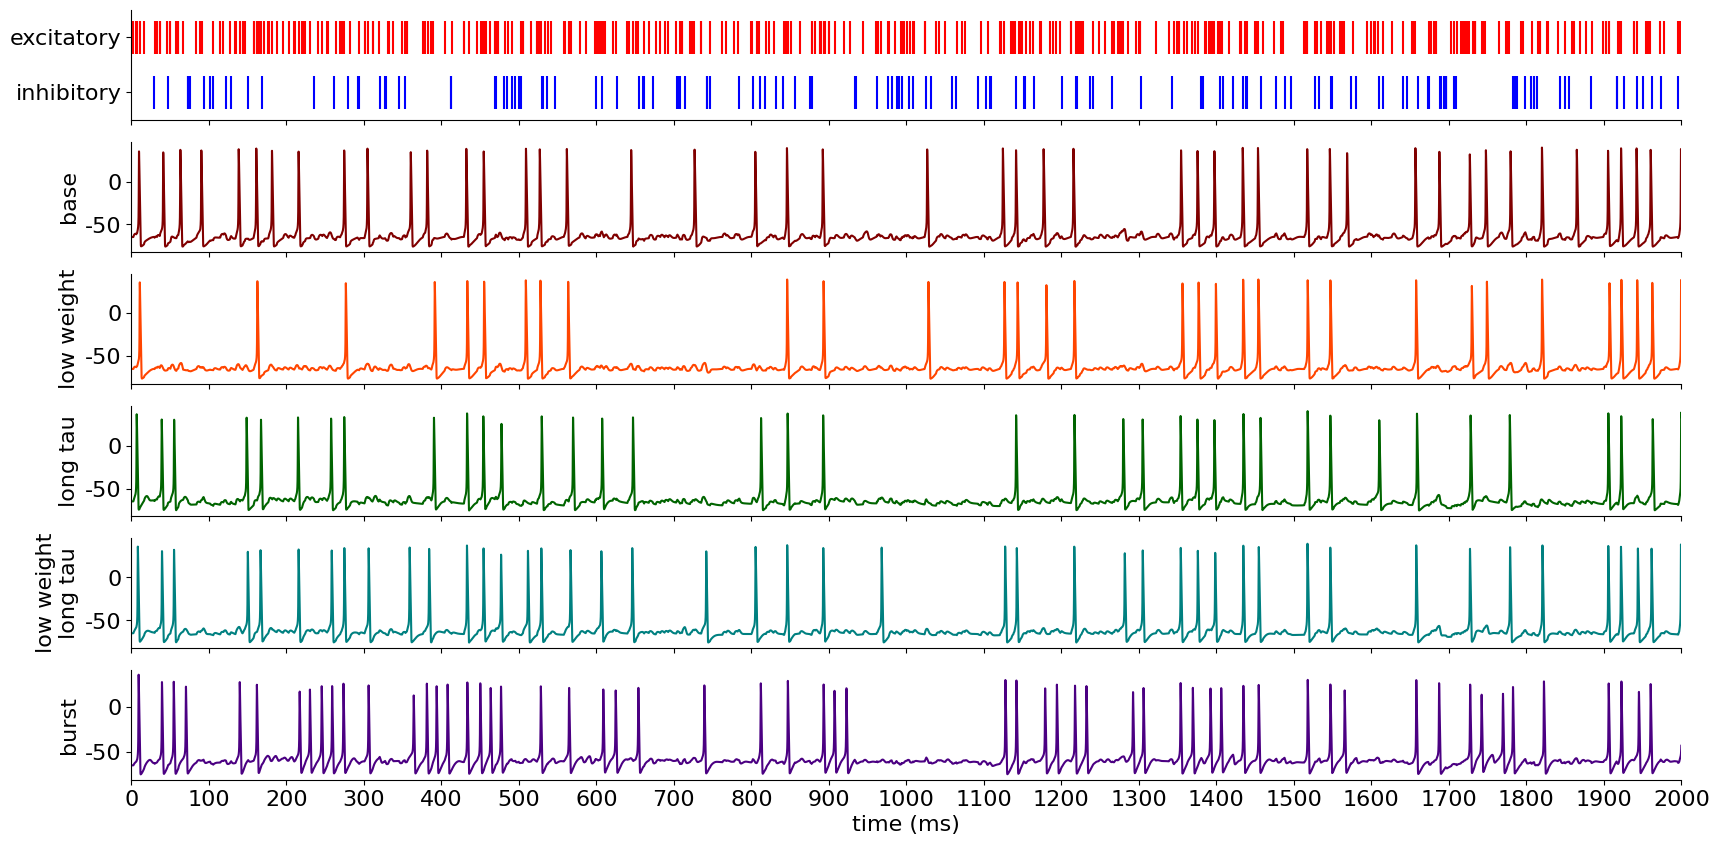

In [7]:
fig, axes = plt.subplots(6,1, figsize=(20,10), sharex=True)

axes[0].vlines(e_times, .2, .8, color='red')
axes[0].vlines(i_times, -.8, -.2, color='blue')
axes[0].set_ylim(-1,1)
axes[0].set_yticks([.5,-.5])
axes[0].set_yticklabels(['excitatory','inhibitory'], fontsize=16)
axes[0].spines['right'].set_visible(False)
axes[0].spines['top'].set_visible(False)

for ax, sim in enumerate(sims):
    axes[ax+1].plot(sim._t, sim._v, c=colors[ax])
    axes[ax+1].set_ylabel(sim_names[ax], fontsize = 16)
    
    axes[ax+1].spines['right'].set_visible(False)
    axes[ax+1].spines['top'].set_visible(False)
    
    axes[ax+1].set_yticks([-50,0])
    axes[ax+1].set_yticklabels([-50, 0], fontsize = 16)

xlim = 2000
axes[-1].set_xlim(0, xlim)
axes[-1].set_xlabel('time (ms)', fontsize=16)

axes[-1].set_xticks(np.arange(0,xlim+1, 100))
axes[-1].set_xticklabels(np.arange(0,xlim+1, 100), fontsize=16)

plt.show()

In [ ]:
fig, axes = plt.subplots(6,1, figsize=(20,10), sharex=True)

axes[0].vlines(e_times, .2, .8, color='red')
axes[0].vlines(i_times, -.8, -.2, color='blue')
axes[0].set_ylim(-1,1)
axes[0].set_yticks([.5,-.5])
axes[0].set_yticklabels(['excitatory','inhibitory'], fontsize=16)
axes[0].spines['right'].set_visible(False)
axes[0].spines['top'].set_visible(False)

for ax, sim in enumerate(sims):
    axes[ax+1].plot(sim._t, sim._v, c=colors[ax])
    axes[ax+1].set_ylabel(sim_names[ax], fontsize = 16)
    
    axes[ax+1].spines['right'].set_visible(False)
    axes[ax+1].spines['top'].set_visible(False)
    
    axes[ax+1].set_yticks([-50,0])
    axes[ax+1].set_yticklabels([-50, 0], fontsize = 16)

xlim = 200
axes[-1].set_xlim(0, xlim)
axes[-1].set_xlabel('time (ms)', fontsize=16)

axes[-1].set_xticks(np.arange(0,xlim+1, 100))
axes[-1].set_xticklabels(np.arange(0,xlim+1, 100), fontsize=16)

plt.show()

## ISIs

In [ ]:
fig, axes = plt.subplots(5,1, sharex=True, figsize=(15,10))
ax_ind = 0

bins = np.arange(0,200,3)

all_isis = []
for sim, sim_name in zip(sims, sim_names):
    spikes = sim.spike_times
    isis = [spikes[i+1] - spikes[i] for i in range(len(spikes) - 1)]
    all_isis.append(isis)
    axes[ax_ind].hist(isis, bins=bins)
    
    ax_ind += 1
    
axes[0].set_xlim(0,200)
plt.show()

In [ ]:
min(all_isis[0])

## median histories

In [ ]:
def standarize_column(column):
    # set column to fit in (0,1)
    column = column-np.min(column)
    column = column/np.max(column)
    return column

def dist(p1, p2):
    # get distance between 2 standardized histories
    return np.sqrt(pow(p1['v']-p2['v'], 2) + pow(p1['m']-p2['m'], 2) + pow(p1['n']-p2['n'], 2) + pow(p1['h']-p2['h'], 2))

def get_median_history(sim):
    _v = standarize_column(np.array(sim._v))
    _m = standarize_column(np.array(sim._m))
    _n = standarize_column(np.array(sim._n))
    _h = standarize_column(np.array(sim._h))

    # calculate the median of each state variable
    median_values = {
        'v': np.median(_v),
        'm': np.median(_m),
        'n': np.median(_n),
        'h': np.median(_h)
    }
    
    dists = []
    for i in range(len(_v)):
        dists.append(dist({'v':_v[i],'m':_m[i],'n':_n[i],'h':_h[i]}, median_values))

    return {
            'v': sim._v[np.argmin(dists)],
            'm': sim._m[np.argmin(dists)],
            'n': sim._n[np.argmin(dists)],
            'h': sim._h[np.argmin(dists)]
    }

def isolate_spiking_histories(sim):
    spiking_histories = []
    for spike in sim.spike_times:
        row = round(40 * spike)
        spiking_histories.append(
            pd.DataFrame(
                {
                    'v':[sim._v[row]], 
                    'm':[sim._m[row]], 
                    'n':[sim._n[row]], 
                    'h':[sim._h[row]]
                }
            )
        )
                                                    
                                                    
    return pd.concat(spiking_histories)

In [ ]:
state_vars = {
    'base':None,
    'low weight':None,
    'long tau':None,
    'half weight\nlong tau':None,
    'burst':None,
}

median_histories = {
    'base':None,
    'low weight':None,
    'long tau':None,
    'half weight\nlong tau':None,
    'burst':None,
}

spiking_histories = {
    'base':None,
    'low weight':None,
    'long tau':None,
    'half weight\nlong tau':None,
    'burst':None,
}

for sim, sim_name in zip(sims, sim_names):
    print(sim_name)
    median_histories[sim_name] = get_median_history(sim)
    spiking_histories[sim_name] = isolate_spiking_histories(sim)

In [ ]:
fig, axes = plt.subplots(1,5, figsize=(15, 3), sharex=True, sharey=True)

ax_ind = 0
for sim, sim_name in zip(sims, sim_names):
    
    axes[ax_ind].hist2d(sim._v, sim._h, bins=80, cmin=1, norm=mpl.colors.LogNorm())
    # median history
    med_history = median_histories[sim_name]
    axes[ax_ind].scatter(med_history['v'], med_history['h'], c='red')
    # spiking history
    spike_histories = spiking_histories[sim_name]
    for i in range(spike_histories.shape[0]):
        axes[ax_ind].scatter(spike_histories.iloc[i]['v'], spike_histories.iloc[i]['h'], c='orange', alpha=1, s=.2)
    
    axes[ax_ind].set_title(sim_name)
    axes[ax_ind].set_xlabel('Vm')
    
    axes[ax_ind].spines['top'].set_visible(False)
    axes[ax_ind].spines['right'].set_visible(False)
    ax_ind += 1
    
axes[0].set_ylabel('h')
axes[1].set_ylim(.05,.8)
axes[1].set_xlim(-80, 45)
plt.show()

In [ ]:
# this is what is communicated to ./scripts/nInputs.py
median_histories

In [ ]:
# find median spiking histories
def get_median_history_from_vecs(df):
    _v = standarize_column(np.array(df['v']))
    _m = standarize_column(np.array(df['m']))
    _n = standarize_column(np.array(df['n']))
    _h = standarize_column(np.array(df['h']))

    # calculate the median of each state variable
    median_values = {
        'v': np.median(_v),
        'm': np.median(_m),
        'n': np.median(_n),
        'h': np.median(_h)
    }
    
    dists = []
    for i in range(len(_v)):
        dists.append(dist({'v':_v[i],'m':_m[i],'n':_n[i],'h':_h[i]}, median_values))

    return {
            'v': df['v'].iloc[np.argmin(dists)],
            'm': df['m'].iloc[np.argmin(dists)],
            'n': df['n'].iloc[np.argmin(dists)],
            'h': df['h'].iloc[np.argmin(dists)]
    }

In [ ]:
median_spiking_histories = {
    'base':get_median_history_from_vecs(spiking_histories['base']),
    'long tau':get_median_history_from_vecs(spiking_histories['long tau']),
    'low weight':get_median_history_from_vecs(spiking_histories['low weight']),
    'burst':get_median_history_from_vecs(spiking_histories['burst']),
    'low weight\nlong tau':get_median_history_from_vecs(spiking_histories['low weight\nlong tau'])
}

In [ ]:
fig, axes = plt.subplots(1,5, figsize=(15, 3), sharex=True, sharey=True)

ax_ind = 0
for sim, sim_name in zip(sims, sim_names):
    
    axes[ax_ind].hist2d(sim._v, sim._h, bins=80, cmin=1, norm=mpl.colors.LogNorm())
    # median history
    med_history = median_histories[sim_name]
    axes[ax_ind].scatter(med_history['v'], med_history['h'], c='red')
    # spiking history
    spike_histories = spiking_histories[sim_name]
    for i in range(spike_histories.shape[0]):
        axes[ax_ind].scatter(spike_histories.iloc[i]['v'], spike_histories.iloc[i]['h'], c='orange', alpha=1, s=.2)
    
    axes[ax_ind].set_title(sim_name)
    axes[ax_ind].set_xlabel('Vm')
    
    axes[ax_ind].spines['top'].set_visible(False)
    axes[ax_ind].spines['right'].set_visible(False)
    
    # median spiking histories
    axes[ax_ind].scatter(
        median_spiking_histories[sim_name]['v'], 
        median_spiking_histories[sim_name]['h'], c='yellow')
    
    ax_ind += 1

axes[0].set_ylabel('h')
axes[1].set_ylim(.05,.8)
axes[1].set_xlim(-80, 45)
plt.show()

In [ ]:
median_spiking_histories